In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from funcs import system_solve

# polynomial
func = lambda x: (x-0.8)**5 + 0.4*(x-0.8)**4 - 0.4*(x-0.8)**3 + 0.4*(x-0.8)**2 - 0.4*(x-0.8)

"""
set parameters
maxdist: maximum distance object can travel
(will be used for total time estimation)
Tmax: also used for total time estimation)
N_points: amount of points to simulate (uniform with time)
mu: friction coef
s0, v0: initial travelled distance & velocity
"""
maxdist = 30
Tmax = 30
N_points = 100
mu = 0.002
s0 = 0
v0 = 0

sol = system_solve(func,
                   maxdist=maxdist,
                   N_points=N_points,
                   Tmax=Tmax,
                   mu=mu,
                   s0=s0,
                   v0=v0)

time_values = sol[0, :]
distance_values = sol[1, :]
velocity_values = sol[2, :]
x_values = sol[3, :]
y_values = sol[4, :]
slope_values = sol[5, :]

Plot x- y- and slope-values of curve

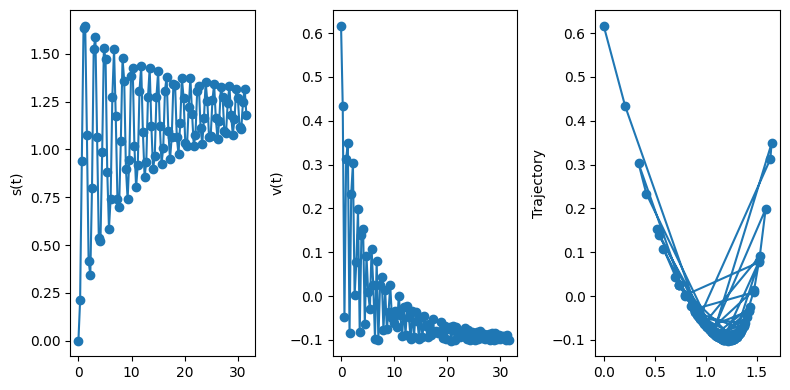

In [2]:
plt.figure(figsize=(8, 4))
plt.subplot(131); plt.plot(time_values, x_values, 'o-'); plt.ylabel('s(t)')
plt.subplot(132); plt.plot(time_values, y_values, 'o-'); plt.ylabel('v(t)')
plt.subplot(133); plt.plot(x_values, y_values, 'o-'); plt.ylabel('Trajectory')

plt.tight_layout(); plt.show()

Visualize trajectory of object by animating its path

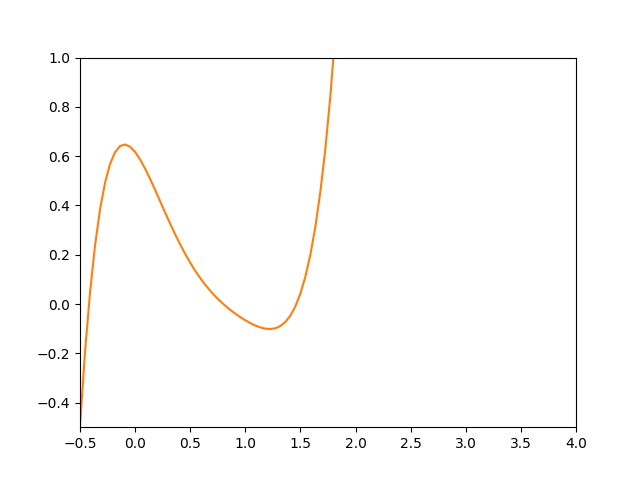

In [4]:
%matplotlib widget
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
x_lower = -0.5
x_upper = 4
y_lower = -0.5
y_upper = 1.0
interval = 50 # ms between frames


ax.set_xlim([x_lower, x_upper])
ax.set_ylim([y_lower, y_upper])

anim_plot = ax.plot([], [])
xrange = np.linspace(x_lower, x_upper, 100)
scatter = ax.scatter([], [])

ax.plot(xrange, func(xrange))

def update_frame(frame):
    # Update scatter with first 'frame+1' points
    current_x = x_values[frame]
    current_y = y_values[frame]
    print(frame)
    scatter.set_offsets(np.column_stack([current_x, current_y]))
    return [scatter]

anim = FuncAnimation(fig, update_frame, frames=N_points, interval=interval, blit=True)